MODEL 1.1
accuracy: 65%

In [12]:
# retrieve the file from drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ERK2 Project/data')

model_df = pd.read_csv('ERK2_pIC50_fp_train.csv')
print(model_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0           0           1           1           0           0           0   
1           1           1           1           0           0           0   
2           2           1           0           0           0           0   
3           3           1           1           0           0           0   
4           4           1           1           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP872  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           

In [3]:
#sets the values of X (inputs) and Y (expected outputs)
model_df = model_df.loc[:, ~model_df.columns.str.contains('^Unnamed')]
X = model_df.drop("pIC50", axis = 1)
#Y = 10 ** (-model_df.pIC50) * (10 ** 9)
Y = model_df.pIC50
print(X.shape, Y.shape, sep = " ")
X.head()

(3846, 881) (3846,)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Removing low variance features in the fp (fingerprint).
# Prevents the likelihood of overfitting to given data.

# after testing on test dataset, no feature removal lead to best results
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.2 * (1 - 0.85)))
#X = selection.fit_transform(X)

print(X.shape)

(3846, 881)


In [5]:
# splits the data to 80 / 20 (80 for the training, 20 for the testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3076, 881) (3076,)
(770, 881) (770,)


In [6]:
# building the regression model using random forest

np.random.seed(2342)
# estimators adjusted to reflect sample size and prevent overfitting
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
print(r2*100, "accuracy")

65.34845411827533 accuracy


In [7]:
Y_pred = model.predict(X_test)

LinregressResult(slope=0.7045983328815808, intercept=2.259117900507853, rvalue=0.8105659602740989, pvalue=1.2434450354619966e-180, stderr=0.01836998601309066, intercept_stderr=0.1427355946026027)
slope 0.7045983328815808
intercept 2.259117900507853
0.6534845411827532 accuracy


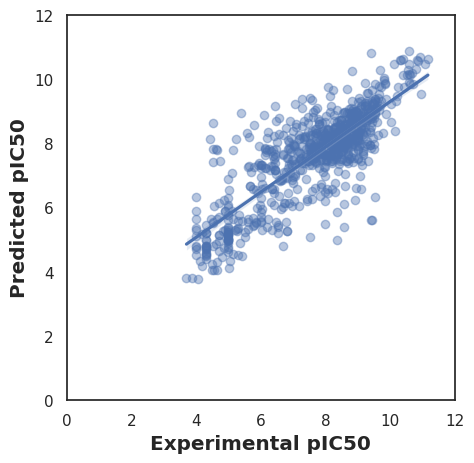

In [16]:
# creating a scatterplot of predicted versus actual pIC50 values

sns.set(color_codes=True)
sns.set_style("white")

log_y_test = -np.log10(Y_test) + 9
log_y_pred = -np.log10(Y_pred) + 9


ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('experimental_predicted_pIC50.png')

#finding the slope (should be close to 1 for 1 to 1 correspondence)
import scipy.stats as sps

linreg = sps.linregress(Y_test, Y_pred)
print(linreg)

print('slope', linreg.slope)
print('intercept', linreg.intercept)
print(r2, "accuracy")

In [ ]:
# save the model into a pickle file for easy retrieval front-end
import pickle

filename = 'model.pkl'

with open (filename, 'wb') as file:
  pickle.dump(model, file)

In [ ]:
! cp model.pkl "/content/drive/My Drive/ERK2 Project/data"

cp: 'model.pkl' and '/content/drive/My Drive/ERK2 Project/data/model.pkl' are the same file


In [ ]:
from google.colab import drive
import os
import pickle
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ERK2 Project/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = 'model.pkl'
with open (filename, 'rb') as file:
  model_test = pickle.load(file)
model_test

RandomForestRegressor()

#### We now have a Random Forest Regressor model that can output an R^2 score of 0.65, indicating significant correlation between predicted and true bioactivity levels. Splitting our data into building the Random Forest Model (80%) and testing for accuracy (20%) also ensures our results aren't "over-tailored" to our dataset, and are less vulnerable to overfitting.  